# SUN

In [2]:
from rembg import remove 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt

## Images

In [1]:
# Choose an object for the subject of the word cloud
object_name = 'sun'

In [3]:
# Once you have a working silhouette, mark this false so it is not overwritten accidentally
ImagesNotProcessed = True 

### Internet Images

In [4]:
if ImagesNotProcessed:
    from simple_image_download import simple_image_download as simp 
    response = simp.Downloader()
    keyword = object_name
    try:
        response.download(keyword, 17)
        print("Images downloaded successfully.")
    except Exception as e:
        print("An error occurred:", e)

Images downloaded successfully.


#### Find an image in /simple_images as the basis for your cloud
#### Save that image as [object_name].png in /assets

### Strip Background

In [5]:
if ImagesNotProcessed:
    input_img = 'assets/'+object_name+'.png'
    output_img = 'assets/'+object_name+'_out.png'

    inp = Image.open(input_img)
    output = remove(inp)

    output.save(output_img)

if False: #Try this next
    output = remove(Image.open('assets/'+object_name+'.png')).save('assets/'+object_name+'_out.png')

### Silhouette

In [6]:
if ImagesNotProcessed:
    im = Image.open('assets/'+object_name+'_out.png')
    
    # Extract the main channel and threshold it at 80% white
    alpha = im.getchannel('A')
    alphaThresh = alpha.point(lambda p: 255 if p>200 else 0)
    
    # Make a new completely black image same size as original 
    res = Image.new('RGB', im.size)
    
    # Copy across the alpha channel from original
    res.putalpha(alphaThresh)
    res.save('assets/'+object_name+'_sil.png')

###### You may run into problems if the file size is too large.  (Output of wordcloud does not get masked).  Take a screenshot of image just made and save that over it.

## Text

##### Create a text file at assets/[object_name].txt.  (from wikipedia, for example)  You may get errors and need to remove some characters.

In [7]:
# Set this to False when text is fully processed
TextNotProcessed = True

In [8]:
if TextNotProcessed:
    data = open('assets/'+object_name+'.txt', 'r', encoding="utf8").read()

## Word Cloud

In [41]:
stopwords = set(STOPWORDS)
stop_list = ['bibcode', 'archived', 'garxiv', 'retrieved', 'may', 'H', 'isbn', 'p', 'Archived', 'j', 'doi', 'f', 'will', 'March']
for word in stop_list:
    STOPWORDS.add(word)
    STOPWORDS.add(' '+word)
    STOPWORDS.add(word+' ')
    STOPWORDS.add('\t'+word)
    STOPWORDS.add(word+'\t')    

object_cloud = WordCloud()
object_cloud.generate(data)
print('Wordcloud Created')

Wordcloud Created


In [16]:
object_mask = np.array(Image.open('assets/'+object_name+'_sil.png'))
print('Mask Created')

Mask Created


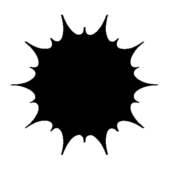

In [17]:
fig = plt.figure(figsize=(2,3))
plt.imshow(object_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

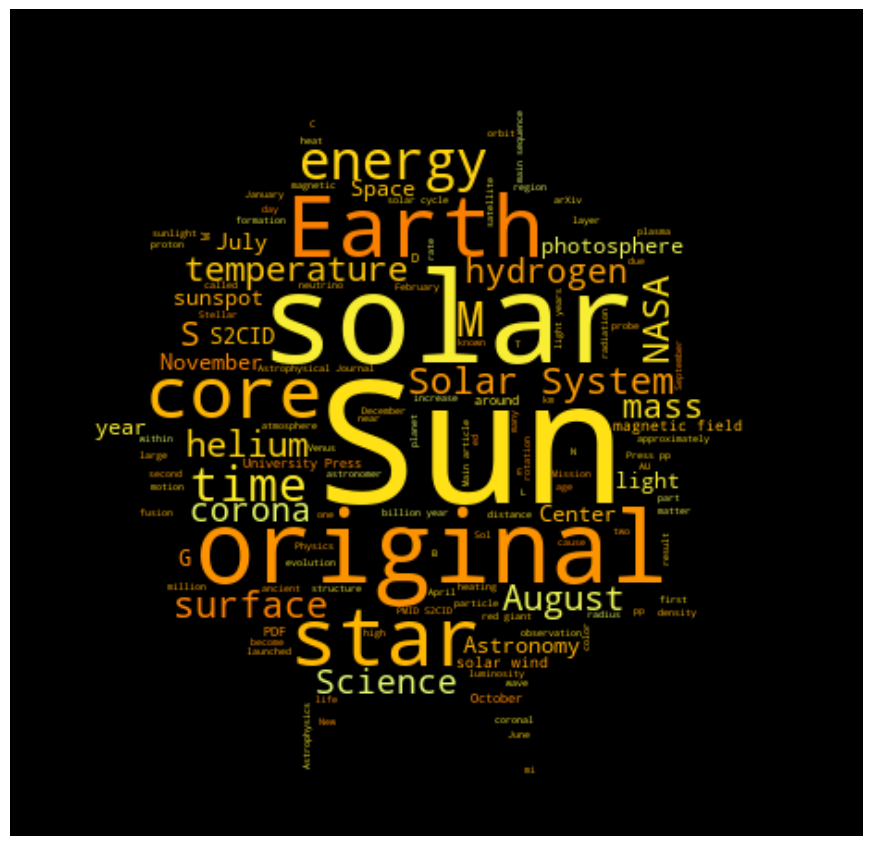

In [42]:
object_cloud = WordCloud(background_color='black', max_words=5000, mask=object_mask, colormap = "Wistia", stopwords=stopwords)
object_cloud.generate(data)
fig = plt.figure(figsize=(11,11))
plt.imshow(object_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()